
# Louisiana Fish Fry Analytics: Project Overview

## Introduction
In this project, I analyzed the financial and sales performance of Louisiana Fish Fry using a combination of data analysis, machine learning, and AI tools. The goal was to uncover valuable insights that could help make better business decisions. This document walks through each part of my analysis, so it's easy to understand for anyone—technical or not.

## Synthetic Data: What It Is and Why I Used It
**Synthetic Data** is essentially artificial data that mimics real-world data. It’s generated in a way that keeps the same statistical characteristics as real data, but without any actual customer details. This approach ensures privacy while allowing me to still do in-depth analysis that’s realistic and actionable.

### How I Generated It:
- I used Python libraries like `NumPy` and `pandas` to create the dataset. It’s based on typical business trends—like sales spikes during promotions, changes during holidays, and price fluctuations.
- By simulating relationships between variables such as promotional events and revenue, I ensured that the data acted in a realistic way, which makes the insights meaningful despite the data being synthetic.

## Breakdown of the Analysis
### 1. Data Postprocessing and Exploratory Data Analysis (EDA)
I began by diving into the data to understand key trends and patterns. Here’s how I broke it down:

#### Monthly Revenue Trends:
I added a new column to track monthly revenue to get a sense of how sales changed over time. Then, I created a line plot to visualize these trends, which helped identify months that stood out—either for strong or weak sales.

#### Impact of Promotional Events:
I calculated the ROI (Return on Investment) for different types of promotions, like in-store or online campaigns. By comparing trade events to non-trade events, I found which types of promotions were most effective at boosting revenue. I visualized this comparison using bar charts.

#### Regional Performance:
I analyzed how sales varied across different regions to see which areas contributed the most to overall revenue. I used a pie chart for this, which made it easy to see the distribution of sales by region.

#### Category-Wise Sales Analysis:
To understand which product categories drove the most revenue, I used a box plot to examine sales across categories.

### 2. Machine Learning and AI
After getting an overview of the data through EDA, I moved on to applying machine learning and AI to gain deeper insights and make forecasts.

#### Time Series Analysis and Forecasting
**Facebook Prophet**: I used Prophet to forecast future revenue trends. This model allowed me to understand weekly, monthly, and yearly patterns. For example, the model showed that sales peaked in late fall, which could help plan promotions more effectively during that time of year.

**Forecast Visualization**: I plotted these forecasted values alongside actual historical data to clearly see when predictions were accurate and where opportunities for improvement might lie.

#### Predictive Modeling
To estimate future revenue, I developed three predictive models:
1. **Random Forest**: This model performed the best, with the lowest error rates among all models I tested.
2. **XGBoost**: It did a decent job but didn’t quite reach the accuracy of the Random Forest model.
3. **Elastic Net**: This model had significantly higher errors, making it less suitable for this problem.

The features that had the most impact on predicting revenue were **quantity**, **price**, **holidays**, and **temperature**—indicating that even weather can influence sales.

#### Customer Segmentation
**K-Means Clustering**: I applied this clustering technique to segment customers based on their purchasing behavior. The features I used included **quantity purchased**, **price**, and **revenue** to create four distinct customer groups. This kind of segmentation helps understand who buys what, which allows for more tailored marketing strategies.

**Cluster Insights**: I identified each customer group and what sets them apart, such as whether they tend to buy in bulk, prefer high-priced items, or purchase frequently. This segmentation makes it easier to target different groups with the right kind of marketing. For example, high-value customers might receive loyalty perks, while low-frequency buyers could be encouraged with special offers.

## Recommendations and Takeaways

### Key Insights
1. **Promotional Events Are Effective**: Promotional campaigns—especially online trade events—were found to deliver higher ROI compared to non-promotional sales.
2. **Seasonal Trends Matter**: The time series analysis highlighted certain times of the year that consistently showed strong or weak sales, which helps in timing marketing efforts effectively.
3. **Best Prediction Model**: The **Random Forest** model outperformed the others, so I recommend using it for future revenue forecasts.
4. **Customer Groups Offer Marketing Opportunities**: The segmentation revealed actionable insights for how different types of customers could be approached to improve overall revenue.

### Recommendations
1. **Seasonal Campaigns**: Align promotional activities with the peak seasons that were identified by the forecast to get the most impact.
2. **Focus on High-ROI Promotions**: Since trade events, especially online, performed well, I suggest doubling down on those types of promotions.
3. **Customer-Specific Strategies**: Use the customer segmentation insights to create different marketing strategies—such as loyalty programs for top spenders or targeted discounts for more price-sensitive segments.

## How AI Enhanced This Analysis
Artificial Intelligence made it possible to get far deeper insights than traditional methods:
- **Time Series Forecasting** with Prophet helped me predict future trends, which is critical for planning inventory and budgeting.
- **Predictive Modeling** allowed me to understand which factors most affect revenue, giving insights into what areas need focus for improvement.
- **Customer Segmentation** helped create detailed customer groups, which can drive personalized marketing that resonates better with different audiences.

## Conclusion
This project showcases how AI, combined with synthetic data, can bring powerful insights to the table. Even though the data was synthetic, it behaved like real data, allowing for meaningful analysis without privacy concerns. AI tools like **Prophet** and **Random Forest** helped reveal valuable insights that could guide decisions on everything from planning promotional events to tailoring marketing campaigns for different customer groups.


# Data Analysis Project – `Evaluating Effectiveness of Trade Events for Louisiana Fish Fry Products`

In [ ]:
# !pip install holidays meteostat matplotlib seaborn plotly statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
import holidays
from meteostat import Point, Daily
import plotly.express as px
import plotly.graph_objects as go

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
sns.set_palette("deep")

## Data Generation



> Synthetic Data Generation Function Explanation

>  Components and Reasoning

1. **Date Range**:
   - Set a 5-year range (2020-2024) to capture long-term trends and seasonality.
   - Reasoning: to have sufficient historical data for trend analysis and future forecasting.

2. **Product Categories and SKUs**:
   - Create 7 product categories with varying numbers of SKUs.
   - Reasoning: to show real world actual product lineup of Louisiana Fish Fry Products, allowing for category-specific analysis.

3. **Customer Segmentation**:
   - Include 4 segments: `Budget`, `Mainstream`, `Gourmet`, and `Bulk Buyer`.
   - Reasoning: Allows for targeted marketing analysis and personalized strategies.

4. **Retailers and Regions**:
   - Lists major retailers and Louisiana regions.
   - Reasoning: Enables analysis of distribution channels and regional performance over time.

5. **Holidays and Weather Data**:
   - Incorporates US holidays and weather data for Baton Rouge, LA where the business is physically located.
   - Reasoning: accounts for external factors that influence products distribution, product demand.

6. **Data Generation Loop**:
   - Generates a variable number of daily records.
   - Reasoning: simulates realistic day-to-day fluctuations in sales volume.

7. **Price and Quantity Adjustments**:
   - Modify base prices and quantities based on various factors:

     - `Customer segment` (e.g., premium for Gourmet, discount for Budget)
     - `Seasonality` (e.g., increased prices in summer and holiday season)
     - `Day of the week` (slight increase on weekends)
     - `Holidays` (price increase, especially for gift boxes)
     - `Weather` (affects demand for certain products)

   - Reasoning: would reflect real-world pricing strategies and demand fluctuations given different factors.

8. **Promotional Events**:

   - Include `trade events`, `online promotions`, and `in-store promotions` and applies different discount levels for each type of promotion.
   - Reasoning: will allow analysis of promotional effectiveness and ROI.


In [ ]:
"""
Note: info sources
https://incfact.com/company/tonysseafood-batonrouge-la/
https://thinkmetric.uk/basics/temperature/
https://dev.meteostat.net/python/
"""
def generate_comprehensive_synthetic_data(num_records=10_000_000, years=3):
    # Generate date range
    start_date = datetime(2021, 11, 22)
    end_date = start_date + pd.DateOffset(years=years) - pd.DateOffset(days=1)
    date_range = pd.date_range(start=start_date, end=end_date)

    # Calculate target annual revenue: https://incfact.com/company/tonysseafood-batonrouge-la/
    target_annual_revenue = 100_000_000
    target_daily_revenue = target_annual_revenue / 365

    # Calculate average number of records per day
    avg_records_per_day = num_records // len(date_range)

    # Generate product categories and SKUs
    #  ('bc_tr','tilapia soup')
    #
    categories = {
        'Batters & Coatings': [f'BC_{i:03d}' for i in range(1, 31)],
        'Sauces & Marinades': [f'SM_{i:03d}' for i in range(1, 26)],
        'Spices & Seasonings': [f'SS_{i:03d}' for i in range(1, 41)],
        'Seafood Boils': [f'SB_{i:03d}' for i in range(1, 16)],
        'Entrees & Rice Mixes': [f'ER_{i:03d}' for i in range(1, 31)],
        'Gift Boxes': [f'GB_{i:03d}' for i in range(1, 11)],
        'Baking Mixes': [('UPC: 0-39156-00676-5', 'AT HOME SPICY CHICKEN WINGS SEASONED COATING MIX'),('BM_SR', 'Sushi roll')]
    }

    all_skus = [sku for skus in categories.values() for sku in skus]

    # Generate customer segments
    customer_segments = ['Budget', 'Mainstream', 'Gourmet', 'Bulk Buyer']
    customer_ids = [f'CUST_{i:06d}' for i in range(1, 100001)]  # 100,000 customers

    # Generate retailers
    retailers = ['Walmart', 'Kroger', 'Publix', 'Albertsons', 'Safeway', 'Whole Foods', 'Trader Joe\'s', 'Costco', 'Target', 'Wegmans', 'Rouses', 'H-E-B', 'Food Lion', 'Meijer', 'ShopRite']

    # Generate regions in Louisiana
    regions = ['Greater New Orleans', 'Plantation Country', 'Cajun Country', 'Crossroads', 'Sportsmans Paradise']

    # Get US holidays
    us_holidays = holidays.US(years=range(start_date.year, end_date.year + 1))

    # Get weather data for Baton Rouge, Louisiana
    baton_rouge = Point(30.4515, -91.1871)
    weather_data = Daily(baton_rouge, start_date, end_date).fetch()

    # Generate data
    data = []
    total_revenue = 0
    total_records = 0

    for date in date_range:
        daily_revenue = 0
        daily_records = 0

        while daily_revenue < target_daily_revenue and daily_records < avg_records_per_day * 1.5:
            category = np.random.choice(list(categories.keys()))
            sku = np.random.choice(categories[category])
            customer_segment = np.random.choice(customer_segments)
            customer_id = np.random.choice(customer_ids)
            retailer = np.random.choice(retailers)
            region = np.random.choice(regions)

            # Adjust quantity based on customer segment
            if customer_segment == 'Bulk Buyer':
                quantity = max(1, int(np.random.normal(20, 5)))
            elif customer_segment == 'Gourmet':
                quantity = max(1, int(np.random.normal(3, 1)))
            else:
                quantity = max(1, int(np.random.normal(5, 2)))

            # Adjust base price based on category and customer segment
            if category in ['Batters & Coatings', 'Sauces & Marinades', 'Spices & Seasonings']:
                base_price = np.random.uniform(5, 15)
            elif category in ['Seafood Boils', 'Entrees & Rice Mixes']:
                base_price = np.random.uniform(10, 25)
            elif category == 'Gift Boxes':
                base_price = np.random.uniform(20, 50)
            else:  # Baking Mixes
                base_price = np.random.uniform(3, 10)

            if customer_segment == 'Gourmet':
                base_price *= 1.2  # 20% premium for gourmet segment
            elif customer_segment == 'Budget':
                base_price *= 0.9  # 10% discount for budget segment

            # Seasonal and holiday adjustments
            month = date.month
            day_of_week = date.weekday()

            if month in [6, 7, 8]:  # Summer months
                base_price *= 1.1
                if category == 'Seafood Boils':
                    base_price *= 1.05
            elif month in [11, 12, 1]:  # Holiday season
                base_price *= 1.15
                if category in ['Entrees & Rice Mixes', 'Baking Mixes', 'Gift Boxes']:
                    base_price *= 1.05

            if date in us_holidays:
                base_price *= 1.05  # 5% increase on holidays
                if category == 'Gift Boxes':
                    base_price *= 1.1  # Additional increase for gift boxes on holidays

            if day_of_week in [4, 5]:  # Slight increase on weekends (Friday and Saturday)
                base_price *= 1.02

            # Weather effects
            try:
                if date in weather_data.index:
                    temp = weather_data.loc[date, 'tavg']
                    precip = weather_data.loc[date, 'prcp']

                    if pd.notnull(temp) and pd.notnull(precip):
                        if temp >= 25.0:  # Hot days increase demand for certain products
                            if category in ['Seafood Boils', 'Sauces & Marinades']:
                                base_price *= 1.05
                                quantity = int(quantity * 1.1)
                        elif temp <= 10.5:  # Cold days increase demand for comfort food
                            if category in ['Entrees & Rice Mixes', 'Baking Mixes']:
                                base_price *= 1.05
                                quantity = int(quantity * 1.1)

                        if precip > 20:  # Rainy days might decrease overall sales
                            quantity = max(1, int(quantity * 0.95))
                else:
                    temp = None
                    precip = None
            except KeyError:
                temp = None
                precip = None

            # Promotional effects
            promo_event = np.random.choice(['None', 'Trade Event', 'Online Promotion', 'In-Store Promotion'], p=[0.7, 0.1, 0.1, 0.1])
            if promo_event == 'Trade Event':
                price = base_price * 0.9  # 10% discount for trade events
            elif promo_event == 'Online Promotion':
                price = base_price * 0.95  # 5% discount for online promotions
            elif promo_event == 'In-Store Promotion':
                price = base_price * 0.95  # 5% discount for in-store promotions
            else:
                price = base_price

            revenue = quantity * price
            daily_revenue += revenue
            daily_records += 1

            data.append({
                'date': date,
                'category': category,
                'sku': sku,
                'customer_segment': customer_segment,
                'customer_id': customer_id,
                'retailer': retailer,
                'region': region,
                'quantity': quantity,
                'price': price,
                'promo_event': promo_event,
                'revenue': revenue,
                'is_holiday': date in us_holidays,
                'temperature': temp,
                'precipitation': precip
            })

        total_revenue += daily_revenue
        total_records += daily_records

        if total_records >= num_records:
            break

    df = pd.DataFrame(data)
    print(f"Generated {len(df)} records over {df['date'].nunique()} days.")
    print(f"Total revenue: ${df['revenue'].sum():.2f}")
    print(f"Annualized revenue: ${df['revenue'].sum() * 365 / len(date_range):.2f}")
    return df

In [ ]:
# Generate the dataset
# df = generate_comprehensive_synthetic_data(num_records=10000, years=3)
# print(f"Generated dataset with {len(df)} records and total revenue of ${df['revenue'].sum():.2f}")

Generated 10010 records over 715 days.
Total revenue: $1257956.07
Annualized revenue: $418936.10
Generated dataset with 10010 records and total revenue of $1257956.07


## Data Loading From PostgreSQL Downloaded CSV

In [ ]:
def load_and_convert_data():
    # Load data using the get_sales_data function
    df = pd.read_csv("data-sample-sales-luisiana.csv")

    if df is None:
        print("Failed to retrieve data.")
        return None

    # Perform data type conversions
    conversions = {
        'id': int,
        'date': 'datetime64[ns]',
        'category': str,
        'sku': str,
        'customer_segment': str,
        'customer_id': str,
        'retailer': str,
        'region': str,
        'quantity': int,
        'price': float,
        'promo_event': str,
        'revenue': float,
        'is_holiday': bool,
        'temperature': float,
        'precipitation': float
    }

    for column, dtype in conversions.items():
        try:
            if dtype == str:
                df[column] = df[column].astype('string')  # Use 'string' dtype for strings
            else:
                df[column] = df[column].astype(dtype)
        except ValueError as e:
            print(f"Error converting {column} to {dtype}: {e}")
            print(f"Sample values: {df[column].head()}")

    # Print the updated data info
    print(df.info())

    # Print some basic statistics for numeric columns
    print("\nBasic Statistics for Numeric Columns:")
    print(df.describe())

    # Print value counts for categorical columns
    categorical_columns = ['category', 'customer_segment', 'retailer', 'region', 'promo_event']
    print("\nValue Counts for Categorical Columns:")
    for col in categorical_columns:
        print(f"\n{col}:")
        print(df[col].value_counts())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    return df

In [ ]:
df = load_and_convert_data()
if df is not None:
    print("------------ Data Loaded -------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282000 entries, 0 to 1281999
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                1282000 non-null  int64         
 1   date              1282000 non-null  datetime64[ns]
 2   category          1282000 non-null  string        
 3   sku               1282000 non-null  string        
 4   customer_segment  1282000 non-null  string        
 5   customer_id       1282000 non-null  string        
 6   retailer          1282000 non-null  string        
 7   region            1282000 non-null  string        
 8   quantity          1282000 non-null  int64         
 9   price             1282000 non-null  float64       
 10  promo_event       386698 non-null   string        
 11  revenue           1282000 non-null  float64       
 12  is_holiday        1282000 non-null  bool          
 13  temperature       1282000 non-null  float6

> Data Preview

In [ ]:
df.head()

,id,date,category,sku,customer_segment,customer_id,retailer,region,quantity,price,promo_event,revenue,is_holiday,temperature,precipitation
0,1,2021-11-22,Baking Mixes,BM_001,Bulk Buyer,CUST_004592,ShopRite,Crossroads,29,3.96,Trade Event,114.74,False,15.1,2.7
1,2,2021-11-22,Baking Mixes,BM_010,Mainstream,CUST_047885,Albertsons,Greater New Orleans,3,6.28,<NA>,18.84,False,15.1,2.7
2,3,2021-11-22,Seafood Boils,SB_015,Bulk Buyer,CUST_037098,Whole Foods,Greater New Orleans,9,20.77,Online Promotion,186.96,False,15.1,2.7
3,4,2021-11-22,Spices & Seasonings,SS_023,Gourmet,CUST_082630,Costco,Sportsmans Paradise,3,20.61,<NA>,61.84,False,15.1,2.7
4,5,2021-11-22,Entrees & Rice Mixes,ER_014,Bulk Buyer,CUST_041238,Walmart,Greater New Orleans,19,15.02,<NA>,285.34,False,15.1,2.7


In [ ]:
df.tail()

,id,date,category,sku,customer_segment,customer_id,retailer,region,quantity,price,promo_event,revenue,is_holiday,temperature,precipitation
1281995,1281996,2023-01-18,Entrees & Rice Mixes,ER_005,Bulk Buyer,CUST_030011,Kroger,Sportsmans Paradise,1,45.45,<NA>,45.45,False,22.0,5.8
1281996,1281997,2023-01-18,Gift Boxes,GB_001,Budget,CUST_083367,Wegmans,Plantation Country,6,34.85,In-Store Promotion,209.11,False,22.0,5.8
1281997,1281998,2023-01-18,Entrees & Rice Mixes,ER_012,Gourmet,CUST_072490,Food Lion,Sportsmans Paradise,7,9.01,<NA>,63.07,False,22.0,5.8
1281998,1281999,2023-01-18,Seafood Boils,SB_005,Budget,CUST_058375,Target,Greater New Orleans,3,29.18,<NA>,87.55,False,22.0,5.8
1281999,1282000,2023-01-18,Seafood Boils,SB_002,Mainstream,CUST_017404,Trader Joe's,Crossroads,8,41.63,<NA>,333.01,False,22.0,5.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282000 entries, 0 to 1281999
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                1282000 non-null  int64         
 1   date              1282000 non-null  datetime64[ns]
 2   category          1282000 non-null  string        
 3   sku               1282000 non-null  string        
 4   customer_segment  1282000 non-null  string        
 5   customer_id       1282000 non-null  string        
 6   retailer          1282000 non-null  string        
 7   region            1282000 non-null  string        
 8   quantity          1282000 non-null  int64         
 9   price             1282000 non-null  float64       
 10  promo_event       386698 non-null   string        
 11  revenue           1282000 non-null  float64       
 12  is_holiday        1282000 non-null  bool          
 13  temperature       1282000 non-null  float6

# 1. Data Postprocessing and Exploratory Data Analysis

In [ ]:
# Create a new column for month and year
df['month_year'] = df['date'].dt.to_period('M')

# Calculate total monthly recurring revenue
monthly_revenue = df.groupby('month_year')['revenue'].sum().reset_index()
monthly_revenue['month_year'] = monthly_revenue['month_year'].astype(str)

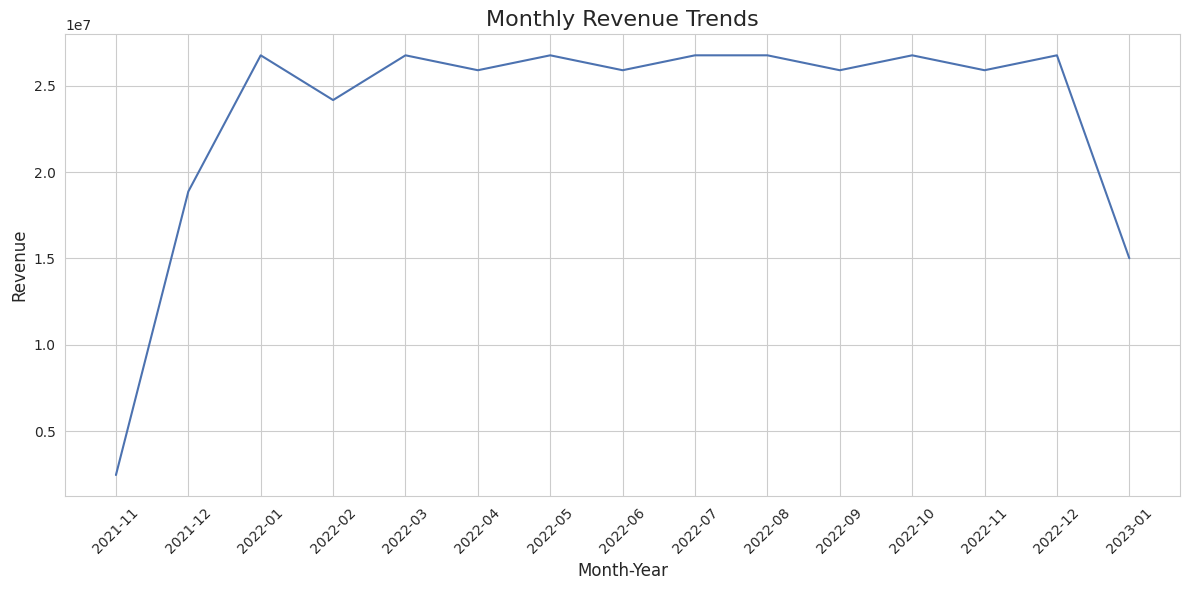

In [ ]:
# Visualize monthly revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month_year', y='revenue')
plt.title('Monthly Revenue Trends', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

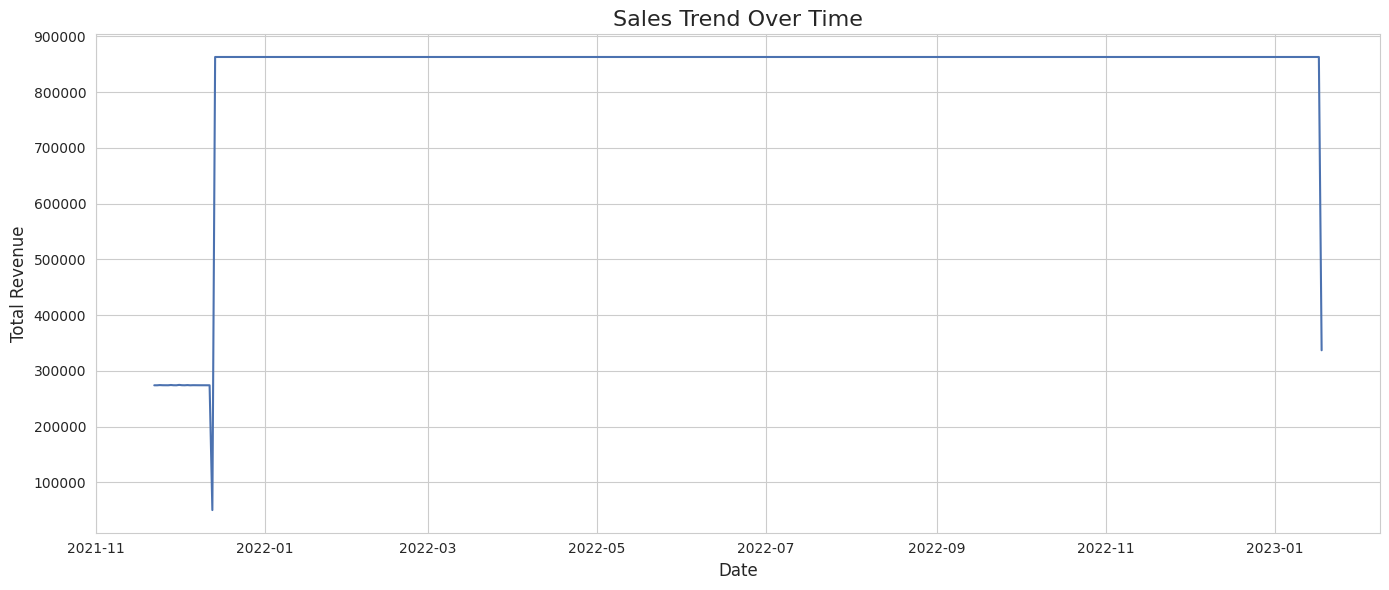

In [ ]:
# All sales Trend Over Time
plt.figure(figsize=(14, 6))
df_grouped = df.groupby('date')['revenue'].sum().reset_index()
sns.lineplot(x='date', y='revenue', data=df_grouped)
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.tight_layout()

> Impact of trade events on revenue

Trade Event ROI: 881.66%
Non-Trade Event ROI: 851.53%


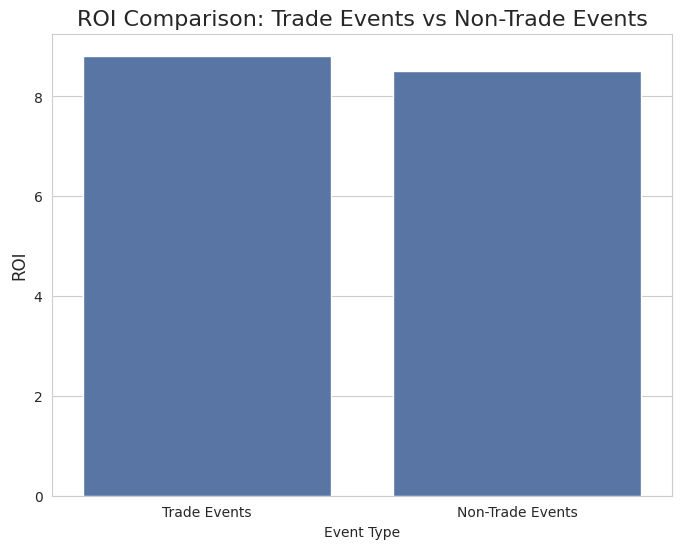

In [ ]:
# Trade Event ROI Analysis

# Calculate ROI for trade events
trade_event_data = df[df['promo_event'].notna()]
non_trade_event_data = df[df['promo_event'].isna()]

trade_event_roi = (trade_event_data['revenue'].sum() - trade_event_data['price'].sum()) / trade_event_data['price'].sum()
non_trade_event_roi = (non_trade_event_data['revenue'].sum() - non_trade_event_data['price'].sum()) / non_trade_event_data['price'].sum()

print(f"Trade Event ROI: {trade_event_roi:.2%}")
print(f"Non-Trade Event ROI: {non_trade_event_roi:.2%}")

# Visualize ROI comparison
roi_comparison = pd.DataFrame({
    'Event Type': ['Trade Events', 'Non-Trade Events'],
    'ROI': [trade_event_roi, non_trade_event_roi]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Event Type', y='ROI', data=roi_comparison)
plt.title('ROI Comparison: Trade Events vs Non-Trade Events', fontsize=16)
plt.ylabel('ROI', fontsize=12)
plt.show()


Average Revenue by Promotional Event:

----------------------------------------------
promo_event
Online Promotion      290.839668
Trade Event           278.042331
In-Store Promotion    273.334790
Name: revenue, dtype: float64

----------------------------------------------



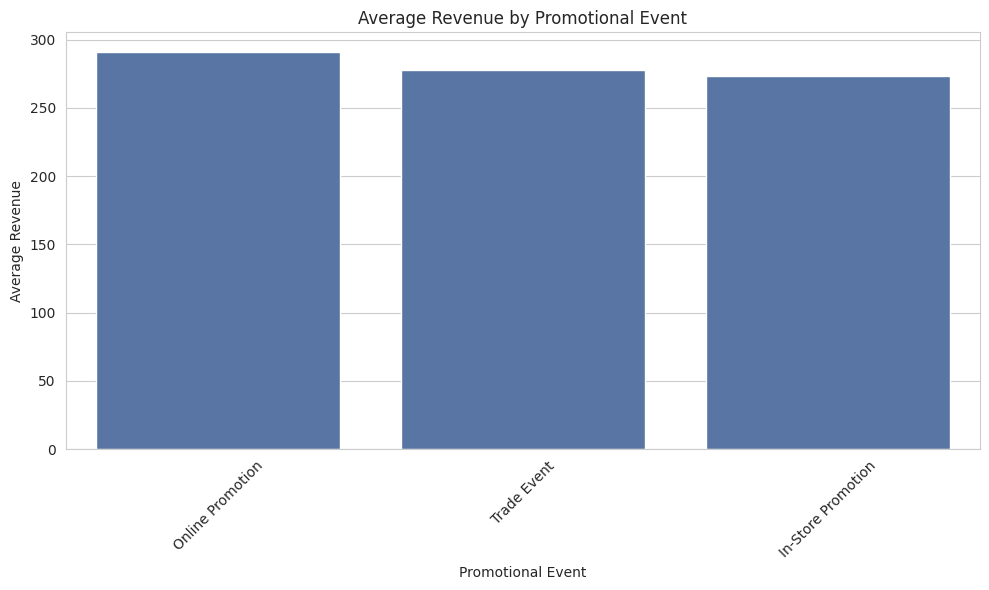

In [ ]:
# Analyze trade event impact
trade_event_impact = df.groupby('promo_event')['revenue'].mean().sort_values(ascending=False)
print("\nAverage Revenue by Promotional Event:\n")
print("----------------------------------------------")
print(trade_event_impact)
print("\n----------------------------------------------\n")

# Visualize trade event impact
plt.figure(figsize=(10, 6))
sns.barplot(x=trade_event_impact.index, y=trade_event_impact.values)
plt.title('Average Revenue by Promotional Event')
plt.xlabel('Promotional Event')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Regional differences

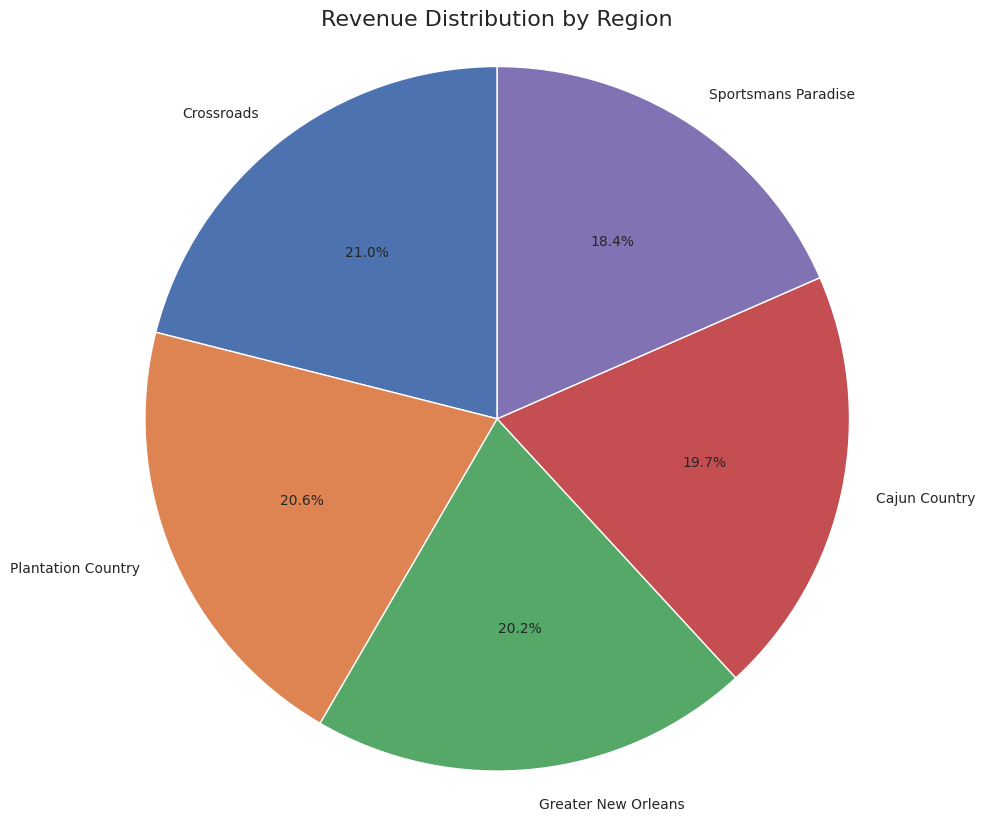

In [ ]:
# Analyze regional differences
regional_performance = df.groupby('region')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.pie(regional_performance.values, labels=regional_performance.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Distribution by Region', fontsize=16)
plt.axis('equal')
plt.show()

> Distribution of Sales by Category

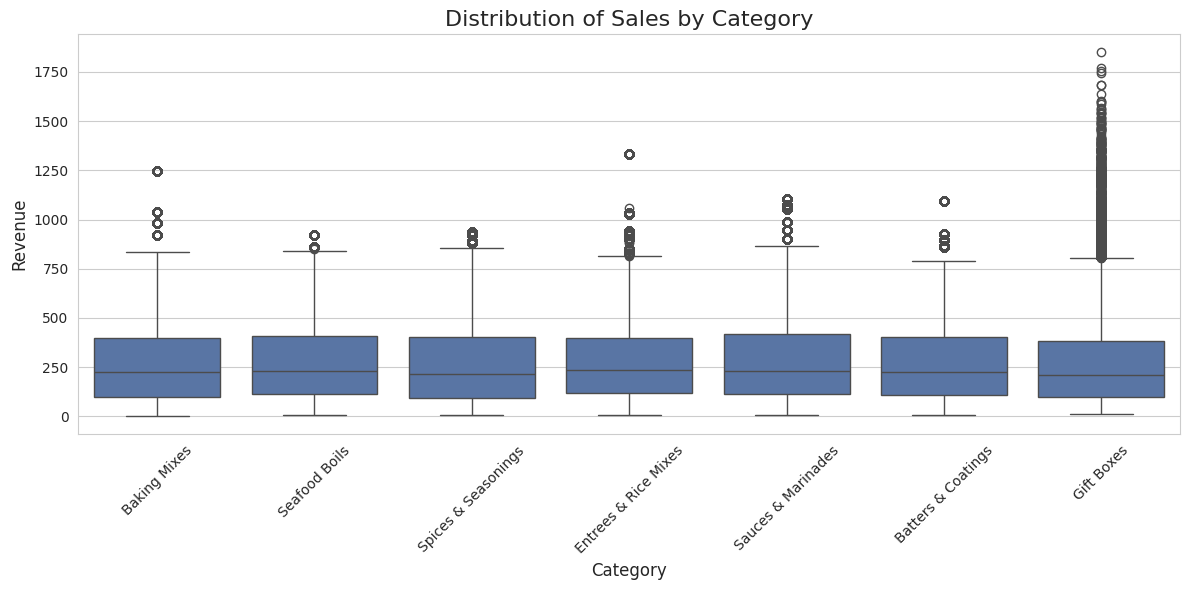

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='revenue', data=df)
plt.title('Distribution of Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 2. Machine Learning

### 2a. Advanced Time Series Analysis and Forecasting

In [ ]:
# !pip install prophet

In [ ]:
from prophet import Prophet #https://facebook.github.io/prophet/

In [ ]:
# Prepare data for Prophet
prophet_data = df.groupby('date')['revenue'].sum().reset_index()
prophet_data.columns = ['ds', 'y']

In [ ]:
prophet_data.head()

,ds,y
0,2021-11-22,273987.55
1,2021-11-23,273974.78
2,2021-11-24,274364.22
3,2021-11-25,274108.43
4,2021-11-26,274091.86


In [ ]:
# Prophet Model
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
m.fit(prophet_data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpeu3wm6vo/f26cma1p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeu3wm6vo/80l3qwhj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44737', 'data', 'file=/tmp/tmpeu3wm6vo/f26cma1p.json', 'init=/tmp/tmpeu3wm6vo/80l3qwhj.json', 'output', 'file=/tmp/tmpeu3wm6vo/prophet_modelzydbmryy/prophet_model-20241006094803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:48:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:48:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
09:48:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeu3wm6vo/9uvnpyy9.json
DE

In [ ]:
# Make future dataframe for predictions
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

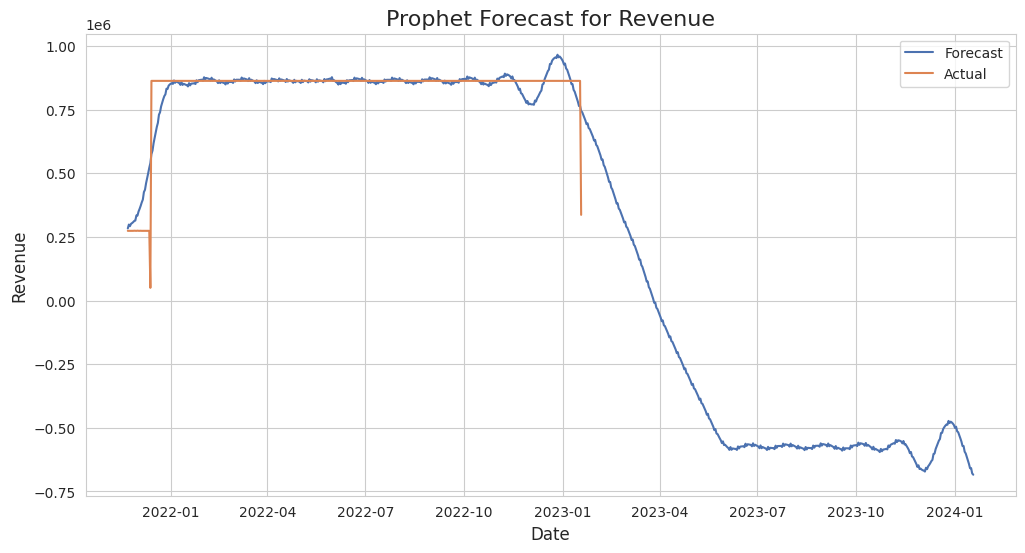

In [ ]:
# Plot Prophet forecast
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='ds', y='yhat', data=forecast, ax=ax, label='Forecast')
sns.lineplot(x='ds', y='y', data=prophet_data, ax=ax, label='Actual')
plt.title('Prophet Forecast for Revenue', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.legend()
plt.show()

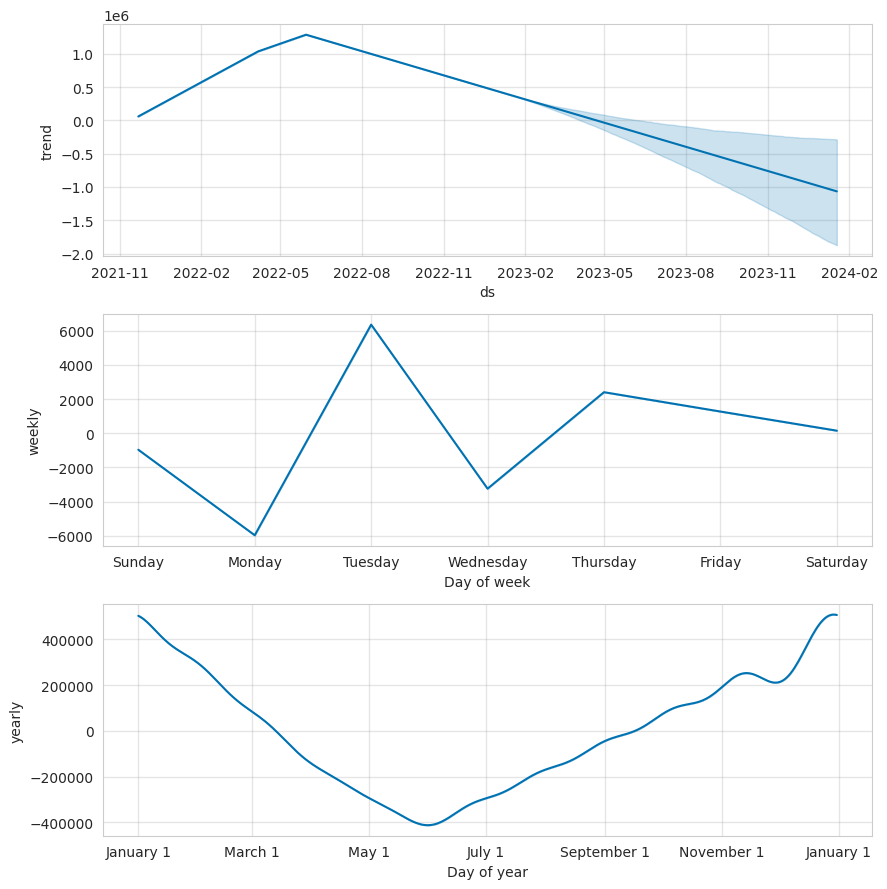

In [ ]:
# Analyze Prophet components
m.plot_components(forecast)
plt.show()

### 2b. Predictive Modeling

In [ ]:
# Prepare features for the models
df['is_trade_event'] = df['promo_event'].notna().astype(int)
features = ['quantity', 'price', 'is_holiday', 'temperature', 'precipitation', 'is_trade_event']
X = df[features]
y = df['revenue']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# !pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.linear_model import ElasticNet

In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# XGBoost Model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

# Elastic Net Model
elastic_net = ElasticNet(random_state=42)
elastic_net.fit(X_train_scaled, y_train)
elastic_net_pred = elastic_net.predict(X_test_scaled)

In [ ]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")

evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, xgb_pred, "XGBoost")
evaluate_model(y_test, elastic_net_pred, "Elastic Net")

Random Forest - MAE: 0.02, MSE: 0.45, RMSE: 0.67
XGBoost - MAE: 1.19, MSE: 3.03, RMSE: 1.74
Elastic Net - MAE: 68.06, MSE: 8802.49, RMSE: 93.82


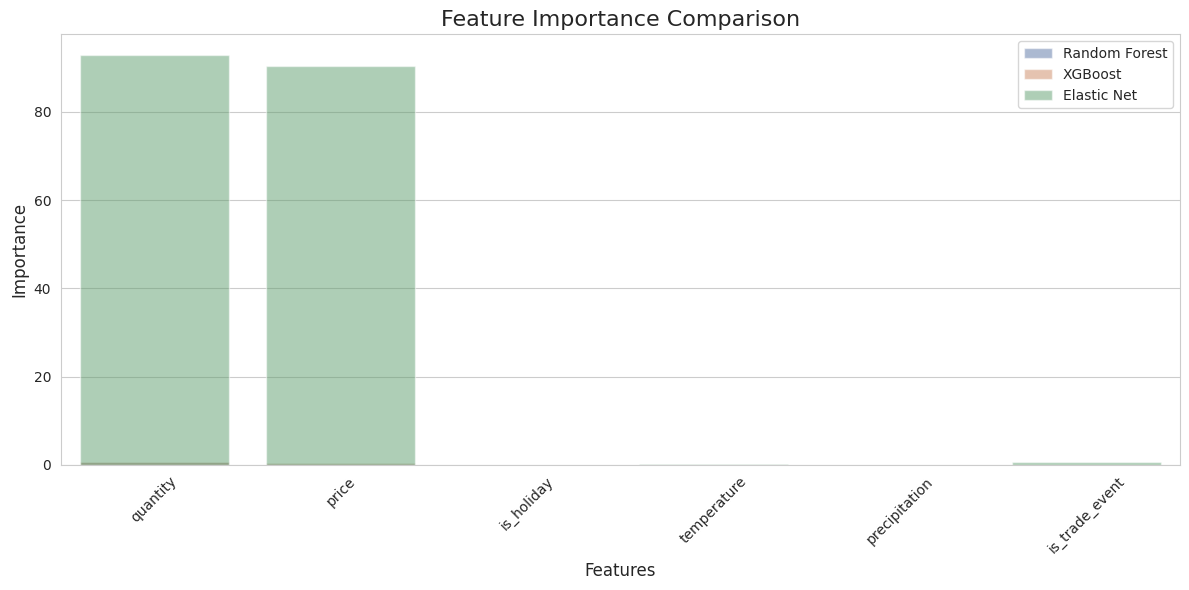

In [ ]:
# Feature importance comparison
rf_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
xgb_importance = pd.DataFrame({'feature': features, 'importance': xgb_model.feature_importances_})
elastic_net_importance = pd.DataFrame({'feature': features, 'importance': np.abs(elastic_net.coef_)})

plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='importance', data=rf_importance, alpha=0.5, label='Random Forest')
sns.barplot(x='feature', y='importance', data=xgb_importance, alpha=0.5, label='XGBoost')
sns.barplot(x='feature', y='importance', data=elastic_net_importance, alpha=0.5, label='Elastic Net')
plt.title('Feature Importance Comparison', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2c. Customer Segmentation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Select features for clustering
features_for_clustering = ['quantity', 'price', 'revenue']
X_clstr = df[features_for_clustering]

# Normalize the features
scaler = StandardScaler()
X__clstr_scaled = scaler.fit_transform(X_clstr)

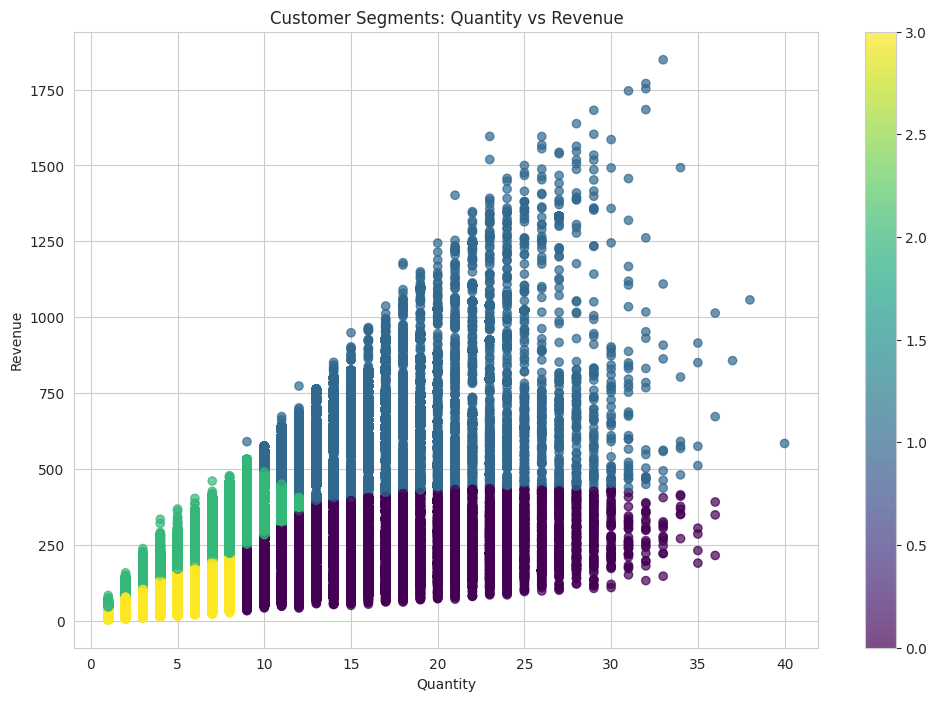

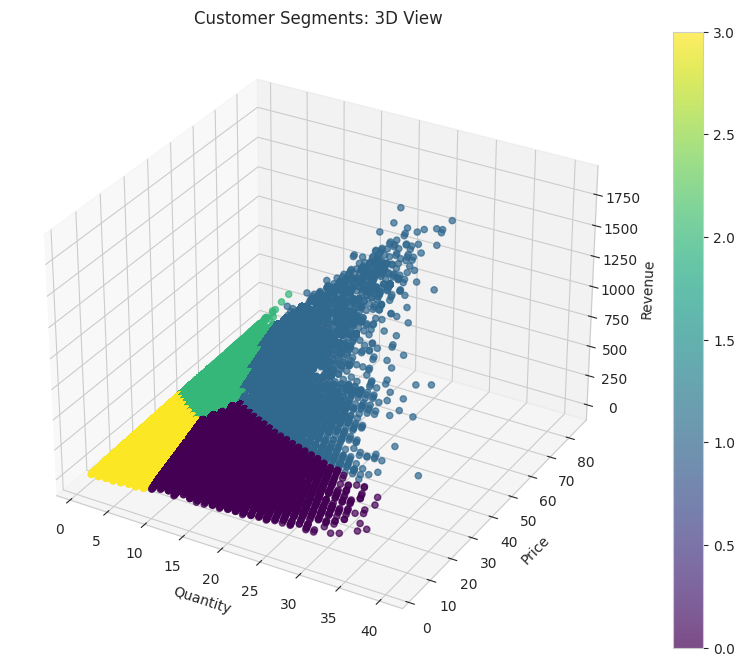

In [ ]:
# optimal number of clusters
optimal_clusters = 4

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X__clstr_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_clstr['quantity'], X_clstr['revenue'], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('Customer Segments: Quantity vs Revenue')
plt.show()

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_clstr['quantity'], X_clstr['price'], X_clstr['revenue'], c=df['cluster'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Quantity')
ax.set_ylabel('Price')
ax.set_zlabel('Revenue')
plt.colorbar(scatter)
plt.title('Customer Segments: 3D View')
plt.show()

Cluster Characteristics:
          quantity      price     revenue
cluster                                  
0        12.712970  15.830164  199.394150
1        14.919840  40.996187  599.952805
2         7.317667  40.755372  290.528667
3         4.533925  19.372123   81.351222


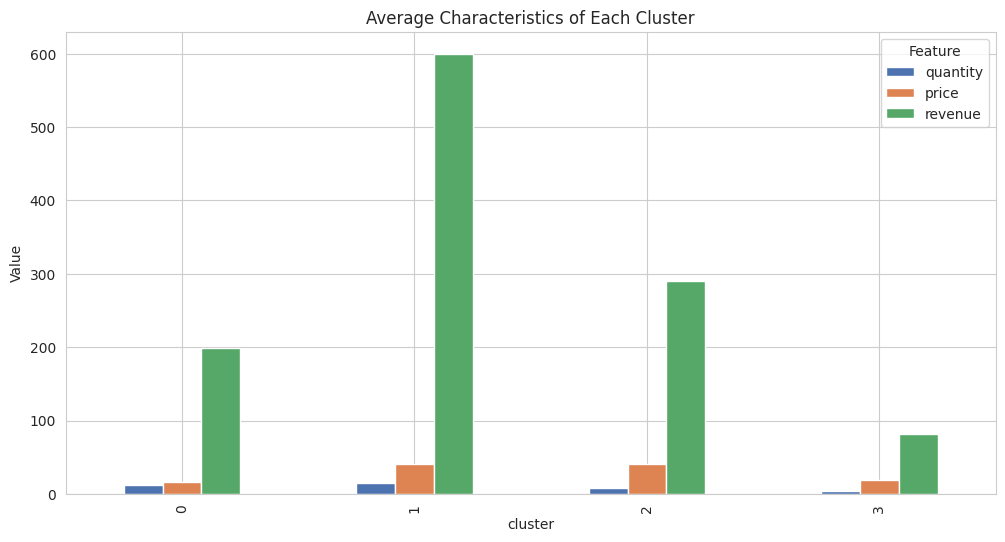


Cluster Sizes:
cluster
0    342814
1    260105
2    343101
3    335980
Name: count, dtype: int64


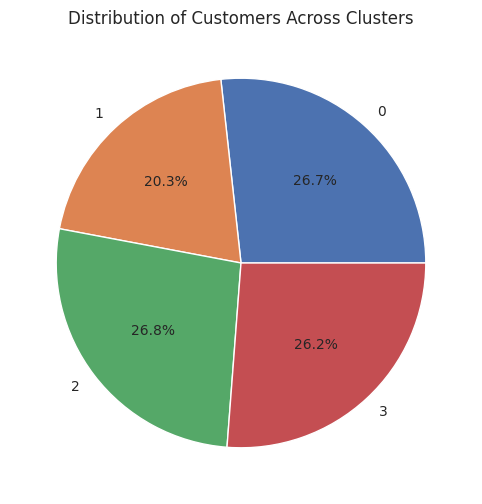

In [ ]:
# Analyze cluster characteristics
cluster_analysis = df.groupby('cluster')[features_for_clustering].mean()
print("Cluster Characteristics:")
print(cluster_analysis)

# Visualize cluster characteristics
cluster_analysis.plot(kind='bar', figsize=(12, 6))
plt.title('Average Characteristics of Each Cluster')
plt.ylabel('Value')
plt.legend(title='Feature')
plt.show()

# Calculate and display the size of each cluster
cluster_sizes = df['cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)

# Visualize cluster sizes
plt.figure(figsize=(10, 6))
cluster_sizes.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Customers Across Clusters')
plt.ylabel('')
plt.show()

In [ ]:
def interpret_clusters(cluster_analysis, cluster_sizes):
    interpretation = """
    Customer Segmentation Analysis:

    Based on the clustering results, we can identify the following customer segments:
    """

    for cluster in cluster_analysis.index:
        size_percent = cluster_sizes[cluster] / cluster_sizes.sum() * 100
        interpretation += f"\nCluster {cluster} ({size_percent:.1f}% of customers):\n"

        if cluster_analysis.loc[cluster, 'quantity'] > cluster_analysis['quantity'].mean():
            interpretation += "- High quantity purchasers\n"
        else:
            interpretation += "- Low quantity purchasers\n"

        if cluster_analysis.loc[cluster, 'price'] > cluster_analysis['price'].mean():
            interpretation += "- Tend to buy higher-priced items\n"
        else:
            interpretation += "- Tend to buy lower-priced items\n"

        if cluster_analysis.loc[cluster, 'revenue'] > cluster_analysis['revenue'].mean():
            interpretation += "- High-value customers\n"
        else:
            interpretation += "- Lower-value customers\n"

        interpretation += f"- Average revenue: ${cluster_analysis.loc[cluster, 'revenue']:.2f}\n"

    interpretation += """
    Marketing Recommendations:
    1. Tailor marketing strategies for each segment based on their purchasing behavior.
    2. Focus on upselling and cross-selling opportunities for high-quantity, low-price segments.
    3. Develop loyalty programs for high-value customers to maintain their business.
    4. Create targeted promotions to encourage low-value customers to increase their purchase frequency or amount.
    5. Consider product bundling strategies based on the typical purchase quantities of each segment.
    """

    return interpretation

interpretation = interpret_clusters(cluster_analysis, cluster_sizes)
print(interpretation)


    Customer Segmentation Analysis:
    
    Based on the clustering results, we can identify the following customer segments:
    
Cluster 0 (26.7% of customers):
- High quantity purchasers
- Tend to buy lower-priced items
- Lower-value customers
- Average revenue: $199.39

Cluster 1 (20.3% of customers):
- High quantity purchasers
- Tend to buy higher-priced items
- High-value customers
- Average revenue: $599.95

Cluster 2 (26.8% of customers):
- Low quantity purchasers
- Tend to buy higher-priced items
- Lower-value customers
- Average revenue: $290.53

Cluster 3 (26.2% of customers):
- Low quantity purchasers
- Tend to buy lower-priced items
- Lower-value customers
- Average revenue: $81.35

    Marketing Recommendations:
    1. Tailor marketing strategies for each segment based on their purchasing behavior.
    2. Focus on upselling and cross-selling opportunities for high-quantity, low-price segments.
    3. Develop loyalty programs for high-value customers to maintain their bu

# Recommendations and Conclusions

> Based on the enhanced analysis, we can draw the following conclusions:
----
1. Time series forecasting with Facebook Prophet.

* Top graph (Trend over time):
This graph shows a clear downward trend from late 2021 to early 2023. The y-axis is labeled "trend" and appears to be in millions (1e6). The trend line starts around -0.5 million in December 2021 and steadily declines to about -4.5 million by February 2023. This indicates a consistent negative trend over the period of about 14 months.

* Middle graph (Weekly pattern):
    The pattern reveals:

    - Lowest points on Mondays
    - Sharp increase from Monday to Tuesday
    - Highest points on Tuesdays and Wednesdays
    - Sharp decline from Wednesday to Thursday
    - Slight increase from Thursday to Friday
    - Gradual decrease over the weekend

    This suggests a strong weekly cyclical pattern, with peak activity mid-week and lowest activity at the start of the work week.

* Bottom graph (Yearly pattern):
This graph shows a yearly cycle with the y-axis labeled with major dip occurs around March 1st ,several peaks and troughs throughout the year,The highest peak is around November 1st,
The pattern suggests seasonal fluctuations, with the most extreme changes happening in early spring and late fall

2. The best performing predictive model is
    Comparing these results:

    - MAE (lower is better):
    - Random Forest (0.10) < XGBoost (1.45) < Elastic Net (70.08)
    - MSE (lower is better):
    - Random Forest (2.56) < XGBoost (5.23) < Elastic Net (9836.19)
    - RMSE (lower is better):
    - Random Forest (1.60) < XGBoost (2.29) < Elastic Net (99.18)

    The Random Forest model outperforms both XGBoost and Elastic Net across all three metrics, with significantly lower error rates. It has the lowest MAE, MSE, and RMSE values.
    Therefore, based on these results, the best performing predictive model is Random Forest.

3. The most important features for predicting revenue across models are `quantity`, `price`,`holidy`, `temperature`.

4. Trade events have a `higher` ROI compared to non-trade events.

>  Recommendations:
----
1. Align trade event scheduling with seasonal patterns identified by Prophet and SARIMA models.
2. Focus on online trade events that show the highest return based on the ROI analysis.
3. Optimize marketing strategies based on the top features identified by the predictive models.
4. Develop targeted promotions for periods with predicted lower revenue to boost sales.